# From the Docs

## Missing Values
From the [Pandas Official Documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

---

In [1]:
import pandas as pd
import numpy as np

pd.__version__

'0.23.4'

In [2]:
home = pd.read_csv('data_processed/home.csv')
home.head()

,Unnamed: 0,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,0,Firefox 57.0,Indonesia,2018-01-05 01:35:47,desktop,Friends / Family - ...,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000000,Media Publishing,Mac
2,2,Chrome 63.0.3239,Indonesia,2018-01-05 16:36:25,desktop,Friends / Family - ...,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,3,Chrome 62.0.3202,Indonesia,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows


Using `pd.isna()` to subset for any rows with NA values in the `Country` column

In [51]:
home.loc[pd.isna(home['Country']),:]

,Unnamed: 0,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
197,197,Chrome 66.0.3359,NaN,2018-05-21 04:13:31,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows
376,376,Opera 55.0.2994,NaN,2018-09-06 06:03:52,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows


In [52]:
so = pd.read_csv('data_input/stackoverflow_qa.csv')
so = so.iloc[0:5,:]
so

,id,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
0,5486226,2011-03-30 12:26:50,4,2113,Rolling median in python,3,4,1.0,yueerhu,125.0,Mike Pennington,26995.0
1,5515021,2011-04-01 14:50:44,8,7015,Compute a compounded return series in Python,3,6,7.0,Jason Strimpel,3301.0,Mike Pennington,26995.0
2,5558607,2011-04-05 21:13:50,2,7392,Sort a pandas DataMatrix in ascending order,2,0,1.0,Jason Strimpel,3301.0,Wes McKinney,43310.0
3,6467832,2011-06-24 12:31:45,9,13056,How to get the correlation between two timeser...,1,0,7.0,user814005,117.0,Wes McKinney,43310.0
4,7577546,2011-09-28 01:58:38,9,2488,"Using pandas, how do I subsample a large DataF...",1,0,5.0,Uri Laserson,958.0,HYRY,54137.0


In [53]:
so['score'].sum()

32

In [54]:
so.mean(axis=1)

0    689433.875
1    694044.500
2    701576.875
3    815541.500
4    954393.000
dtype: float64

In [55]:
so[['score', 'favoritecount']].cumsum()

,score,favoritecount
0,4.0,1.0
1,12.0,8.0
2,14.0,9.0
3,23.0,16.0
4,32.0,21.0


A more practical example of using `.mean()` and `.groupby()`. Notice that only the numerical columns are used

In [56]:
so.groupby('ans_name').mean()

,id,score,viewcount,answercount,commentcount,favoritecount,quest_rep,ans_rep
ans_name,,,,,,,,
HYRY,7577546.0,9.0,2488.0,1.0,0.0,5.0,958.0,54137.0
Mike Pennington,5500623.5,6.0,4564.0,3.0,5.0,4.0,1713.0,26995.0
Wes McKinney,6013219.5,5.5,10224.0,1.5,0.0,4.0,1709.0,43310.0


In [57]:
home.loc[pd.isna(home['Country']),:]

,Unnamed: 0,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
197,197,Chrome 66.0.3359,NaN,2018-05-21 04:13:31,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows
376,376,Opera 55.0.2994,NaN,2018-09-06 06:03:52,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows


Using `fillna()` to fill missing values:

In [58]:
home['Country'] = home['Country'].fillna('Indonesia')
home.iloc[[197,376], :]

,Unnamed: 0,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
197,197,Chrome 66.0.3359,Indonesia,2018-05-21 04:13:31,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows
376,376,Opera 55.0.2994,Indonesia,2018-09-06 06:03:52,desktop,Search Engine,Windows 7,https://algorit.ma/,00000000,Search Engine,Windows


Using `dropna()`:

In [59]:
# drop rows (axis=0) where there's any NA values
print(home.shape)
home.dropna(axis=0, inplace=True)
print(home.shape)

(409, 11)
(409, 11)


Using `interpolate()`:

In [60]:
df = pd.DataFrame({
        'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
print(df)

     A      B
0  1.0   0.25
1  2.1    NaN
2  NaN    NaN
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40


In [61]:
# performs linear interpolation
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


## Split-Apply-Combine
From the [Pandas Official Documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [62]:
so = pd.read_csv('data_input/stackoverflow_qa.csv')
so.groupby(['quest_name']).sum().head()

,id,score,viewcount,answercount,commentcount,favoritecount,quest_rep,ans_rep
quest_name,,,,,,,,
Gangashman,46612532,0,25,1,2,0.0,30.0,0.0
GhostKU,94057770,3,120,5,0,1.0,216.0,21789.0
Yomi,47552255,0,39,1,0,0.0,1.0,0.0
owise,773434028,26,1104,33,22,4.0,3927.0,1573864.0
rizalrazuwan,46272383,-3,135,1,2,0.0,3.0,51675.0


In [63]:
so.groupby(['quest_name']).get_group('Uri Laserson')

,id,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
4,7577546,2011-09-28 01:58:38,9,2488,"Using pandas, how do I subsample a large DataF...",1,0,5.0,Uri Laserson,958.0,HYRY,54137.0
34,9723000,2012-03-15 15:33:47,5,1359,How do I tell pandas to parse a particular col...,1,0,3.0,Uri Laserson,958.0,Wes McKinney,43310.0
115,10791661,2012-05-29 00:06:52,7,12210,How do I discretize values in a pandas DataFra...,5,0,3.0,Uri Laserson,958.0,lbolla,4552.0


In [64]:
gb = so.groupby('quest_name')
gb

In [65]:
so = pd.read_csv('data_input/stackoverflow_qa.csv')
so.sort_values(by=['viewcount', 'answercount', 'favoritecount'], ascending=False,inplace=True)
so.head()

,id,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
181,11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
581,13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0
397,12555323,2012-09-23 19:00:01,406,698537,Adding new column to existing DataFrame in Pyt...,20,0,128.0,tomasz74,2920.0,joaquin,44318.0
1253,17071871,2013-06-12 17:42:05,475,549481,Select rows from a DataFrame based on values i...,10,0,294.0,szli,3374.0,unutbu,464745.0
4587,19482970,2013-10-20 21:18:37,366,541299,Get list from pandas DataFrame column headers,12,1,80.0,natsuki_1996,3483.0,Simeon Visser,65094.0


In [66]:
gb = so.iloc[0:99, :].groupby('quest_name')
gb[['answercount', 'commentcount']].describe().head()

answercount                                    \
                           count mean std  min  25%  50%  75%  max   
quest_name                                                           
AZhao                        1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0   
Adriano Almeida              1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0   
Ahdee                        1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0   
Ahmed Haque                  1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0   
Amelio Vazquez-Reina         1.0  7.0 NaN  7.0  7.0  7.0  7.0  7.0   

                     commentcount                                    
                            count mean std  min  25%  50%  75%  max  
quest_name                                                           
AZhao                         1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0  
Adriano Almeida               1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0  
Ahdee                         1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
Ahmed Haque                   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
Amelio Vazquez-Reina          1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0

In [67]:
gb.aggregate(np.sum).head()
# identical to:
# so.groupby(['quest_name']).sum().head()

,id,score,viewcount,answercount,commentcount,favoritecount,quest_rep,ans_rep
quest_name,,,,,,,,
AZhao,31593201,254,156388,3,3,188.0,3278.0,56206.0
Adriano Almeida,15411158,102,118033,4,2,24.0,1106.0,15383.0
Ahdee,19365513,26,91268,3,0,17.0,692.0,14828.0
Ahmed Haque,25254016,73,113632,4,1,10.0,1363.0,464745.0
Amelio Vazquez-Reina,14940743,96,97049,7,1,28.0,21028.0,2589.0


In [68]:
gb.aggregate(sum).head()

,id,score,viewcount,answercount,commentcount,favoritecount,quest_rep,ans_rep
quest_name,,,,,,,,
AZhao,31593201,254,156388,3,3,188.0,3278.0,56206.0
Adriano Almeida,15411158,102,118033,4,2,24.0,1106.0,15383.0
Ahdee,19365513,26,91268,3,0,17.0,692.0,14828.0
Ahmed Haque,25254016,73,113632,4,1,10.0,1363.0,464745.0
Amelio Vazquez-Reina,14940743,96,97049,7,1,28.0,21028.0,2589.0


In [69]:
sorted = gb.aggregate(np.sum).sort_values(by=['viewcount', 'answercount', 'favoritecount'], ascending=False)
sorted.head()

,id,score,viewcount,answercount,commentcount,favoritecount,quest_rep,ans_rep
quest_name,,,,,,,,
Roman,108513263,901,1206106,30,3,271.0,122088.0,180136.0
bigbug,88761460,1113,1163433,40,12,400.0,47190.0,309816.0
user1504276,11346283,834,931604,21,1,231.0,4206.0,104313.0
John,13411544,710,802655,14,0,198.0,8807.0,43310.0
ezbentley,31987665,469,758593,11,8,144.0,10098.0,118454.0


In [80]:
multiagg = sorted.groupby('quest_name').aggregate(['sum', 'mean', 'std'])
multiagg.head()

id               score          viewcount          \
                           sum      mean std   sum mean std       sum    mean   
quest_name                                                                      
AZhao                 31593201  31593201 NaN   254  254 NaN    156388  156388   
Adriano Almeida       15411158  15411158 NaN   102  102 NaN    118033  118033   
Ahdee                 19365513  19365513 NaN    26   26 NaN     91268   91268   
Ahmed Haque           25254016  25254016 NaN    73   73 NaN    113632  113632   
Amelio Vazquez-Reina  14940743  14940743 NaN    96   96 NaN     97049   97049   

                         answercount ... commentcount favoritecount         \
                     std         sum ...          std           sum   mean   
quest_name                           ...                                     
AZhao                NaN           3 ...          NaN         188.0  188.0   
Adriano Almeida      NaN           4 ...          NaN          24.0   24.0   
Ahdee                NaN           3 ...          NaN          17.0   17.0   
Ahmed Haque          NaN           4 ...          NaN          10.0   10.0   
Amelio Vazquez-Reina NaN           7 ...          NaN          28.0   28.0   

                         quest_rep                ans_rep                
                     std       sum     mean std       sum      mean std  
quest_name                                                               
AZhao                NaN    3278.0   3278.0 NaN   56206.0   56206.0 NaN  
Adriano Almeida      NaN    1106.0   1106.0 NaN   15383.0   15383.0 NaN  
Ahdee                NaN     692.0    692.0 NaN   14828.0   14828.0 NaN  
Ahmed Haque          NaN    1363.0   1363.0 NaN  464745.0  464745.0 NaN  
Amelio Vazquez-Reina NaN   21028.0  21028.0 NaN    2589.0    2589.0 NaN  

[5 rows x 24 columns]

In [82]:
multiagg.sort_values(by=('score', 'sum'), ascending=False).head()

id                score           viewcount               \
                   sum       mean std   sum  mean std       sum     mean std   
quest_name                                                                     
bigbug        88761460   88761460 NaN  1113  1113 NaN   1163433  1163433 NaN   
Roman        108513263  108513263 NaN   901   901 NaN   1206106  1206106 NaN   
user1504276   11346283   11346283 NaN   834   834 NaN    931604   931604 NaN   
John          13411544   13411544 NaN   710   710 NaN    802655   802655 NaN   
Zelazny7      14262433   14262433 NaN   627   627 NaN    178708   178708 NaN   

            answercount ... commentcount favoritecount            quest_rep  \
                    sum ...          std           sum   mean std       sum   
quest_name              ...                                                   
bigbug               40 ...          NaN         400.0  400.0 NaN   47190.0   
Roman                30 ...          NaN         271.0  271.0 NaN  122088.0   
user1504276          21 ...          NaN         231.0  231.0 NaN    4206.0   
John                 14 ...          NaN         198.0  198.0 NaN    8807.0   
Zelazny7             12 ...          NaN         611.0  611.0 NaN   16076.0   

                            ans_rep                
                 mean std       sum      mean std  
quest_name                                         
bigbug        47190.0 NaN  309816.0  309816.0 NaN  
Roman        122088.0 NaN  180136.0  180136.0 NaN  
user1504276    4206.0 NaN  104313.0  104313.0 NaN  
John           8807.0 NaN   43310.0   43310.0 NaN  
Zelazny7      16076.0 NaN   62248.0   62248.0 NaN  

[5 rows x 24 columns]

Applying different aggregation functions to DataFrame Columns works too:

In [83]:
gb = so.iloc[0:99, :].groupby('quest_name')
gb.aggregate({'viewcount': np.mean, 'answercount': np.sum}).head()

,viewcount,answercount
quest_name,,
AZhao,156388.0,3
Adriano Almeida,118033.0,4
Ahdee,91268.0,3
Ahmed Haque,113632.0,4
Amelio Vazquez-Reina,97049.0,7


### Transformation

In [4]:
# len(index) to be 1000, generate 1000 dates
index = pd.date_range('10/1/2018', periods=1000)
index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10',
               ...
               '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [5]:
# loc = mean; scale = sd
np.random.seed(100)
ts = pd.Series(data=np.random.normal(loc=0.5, scale=2.4, size=1000), index=index)
ts.head()

2018-10-01   -3.699437
2018-10-02    1.322433
2018-10-03    3.267286
2018-10-04   -0.105846
2018-10-05    2.855170
Freq: D, dtype: float64

In [6]:
# rolling window calculation
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts.head()

2019-01-08    0.250002
2019-01-09    0.251085
2019-01-10    0.215590
2019-01-11    0.116558
2019-01-12    0.123416
Freq: D, dtype: float64

In [7]:
# using our own groupby and transform methods
key = lambda x: x.year
zscore = lambda x: (x-x.mean()) / x.std()

transformed = ts.groupby(key).transform(zscore)

In [8]:
print(round(transformed.mean(),2))
print(round(transformed.std(), 2))

0.0
1.0


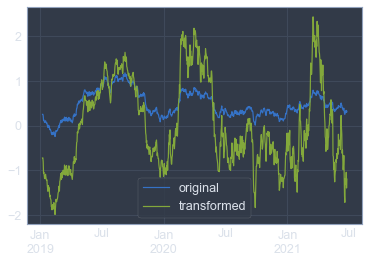

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

compare = pd.DataFrame({
    'original': ts,
    'transformed': transformed
})

compare.plot()

In [29]:
np.random.seed(100)
so = pd.read_csv('data_input/stackoverflow_qa.csv')
so['countryid'] = np.random.randint(0,4,size=56398)
so.head()

,id,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep,countryid
0,5486226,2011-03-30 12:26:50,4,2113,Rolling median in python,3,4,1.0,yueerhu,125.0,Mike Pennington,26995.0,0
1,5515021,2011-04-01 14:50:44,8,7015,Compute a compounded return series in Python,3,6,7.0,Jason Strimpel,3301.0,Mike Pennington,26995.0,0
2,5558607,2011-04-05 21:13:50,2,7392,Sort a pandas DataMatrix in ascending order,2,0,1.0,Jason Strimpel,3301.0,Wes McKinney,43310.0,3
3,6467832,2011-06-24 12:31:45,9,13056,How to get the correlation between two timeser...,1,0,7.0,user814005,117.0,Wes McKinney,43310.0,3
4,7577546,2011-09-28 01:58:38,9,2488,"Using pandas, how do I subsample a large DataF...",1,0,5.0,Uri Laserson,958.0,HYRY,54137.0,3


In [46]:
dat = so.iloc[0:99, [0,2,3,5,6,11,12]]
gb = dat.groupby('countryid')

If we inspect `gb`, we see that there are some `NaN` within the data. We observe that while there's 24 values for `countryid==0`, we only have 20 `ans_rep`; Similarly, out of 27 valus of `countryid==3`, we only have 19:

In [47]:
gb.count()

,id,score,viewcount,answercount,commentcount,ans_rep
countryid,,,,,,
0,24,24,24,24,24,20
1,23,23,23,23,23,16
2,25,25,25,25,25,21
3,27,27,27,27,27,19


In [53]:
# again, observe the NaN
dat.tail()

,id,score,viewcount,answercount,commentcount,ans_rep,countryid
94,10591000,25,20693,2,2,NaN,1
95,10591796,1,159,0,2,NaN,1
96,10594515,0,1333,1,0,NaN,0
97,10595327,4,7773,1,1,43310.0,2
98,10601041,11,3892,1,1,NaN,3


In [52]:
f = lambda x: x.fillna(x.mean())
dat.groupby('countryid').transform(f).tail()

,id,score,viewcount,answercount,commentcount,ans_rep
94,10591000,25,20693,2,2,44930.000000
95,10591796,1,159,0,2,44930.000000
96,10594515,0,1333,1,0,42014.550000
97,10595327,4,7773,1,1,43310.000000
98,10601041,11,3892,1,1,32414.894737


In [67]:
df_re = pd.DataFrame({
    'A': [1] * 4 + [5] * 4,
    'B': np.arange(8)
})

df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,5,4
5,5,5
6,5,6
7,5,7


In [68]:
df_re.groupby('A').rolling(2).B.mean()

A   
1  0    NaN
   1    0.5
   2    1.5
   3    2.5
5  4    NaN
   5    4.5
   6    5.5
   7    6.5
Name: B, dtype: float64

In [71]:
df_re.groupby('A').expanding(2).sum()

A     B
A              
1 0   NaN   NaN
  1   2.0   1.0
  2   3.0   3.0
  3   4.0   6.0
5 4   NaN   NaN
  5  10.0   9.0
  6  15.0  15.0
  7  20.0  22.0

The argument of `filter()` on a groupby object must be a function that, applied to the group as a whole, returns `True` or `False`. For a DataFrame with multiple columns, `filter()` should explicitly specify a column:

In [84]:
df_re.groupby('A').filter(lambda x: x['B'].sum() > 6)

,A,B
4,5,4
5,5,5
6,5,6
7,5,7


Some functions, such as `head()` or `tail()`, when applied to a groupby object will act as a **filter** on the input, returning a reduced shape of the original (and potentially eliminating groups) but with the index unchanged: 

In [85]:
df_re.groupby('A').head(3)

,A,B
0,1,0
1,1,1
2,1,2
4,5,4
5,5,5
6,5,6


In [86]:
df_re.groupby('A').head(3).index

Int64Index([0, 1, 2, 4, 5, 6], dtype='int64')

### Dispatching to instance methods

When aggregating, we may just want to call an instance method on each group. This is usually achieved with a lambda function:

In [87]:
grouped = df_re.groupby('A')
grouped.aggregate(lambda x: x.std())

,B
A,
1,1.290994
5,1.290994


GroupBy has the ability to "dispatch" method calls to group like the following:

In [88]:
grouped.std()

,B
A,
1,1.290994
5,1.290994


In [99]:
np.random.seed(100)
tsdf = pd.DataFrame(
    np.random.rand(500, 3),
    index=pd.date_range('2017-10-1', periods=500),
    columns=['Sales', 'Unit', "Rev"]
)
tsdf.iloc[::2] = np.nan
tsdf.head()

,Sales,Unit,Rev
2017-10-01,NaN,NaN,NaN
2017-10-02,0.844776,0.004719,0.121569
2017-10-03,NaN,NaN,NaN
2017-10-04,0.575093,0.891322,0.209202
2017-10-05,NaN,NaN,NaN


In [100]:
grouped = tsdf.groupby(lambda x: x.year)
grouped.fillna(method='pad').head()

,Sales,Unit,Rev
2017-10-01,NaN,NaN,NaN
2017-10-02,0.844776,0.004719,0.121569
2017-10-03,0.844776,0.004719,0.121569
2017-10-04,0.575093,0.891322,0.209202
2017-10-05,0.575093,0.891322,0.209202


In the above example, we chopped the time series into yearly chunks then independently called `fillna()` on each groups

### Flexible `apply`

Some operations on the grouped data may not fit into the `aggregate()` or `transform()` categories. Sometimes we may simply want GroupBy to infer how to combine the results. For these, we use the `apply()` function, which can be substituted for both `aggregate()` and `transform()` in many standard cases:

In [101]:
tsdf.head()

,Sales,Unit,Rev
2017-10-01,NaN,NaN,NaN
2017-10-02,0.844776,0.004719,0.121569
2017-10-03,NaN,NaN,NaN
2017-10-04,0.575093,0.891322,0.209202
2017-10-05,NaN,NaN,NaN


In [102]:
grouped = tsdf.groupby(lambda x: x.year)
grouped['Unit'].apply(lambda x: x.describe())

2017  count     46.000000
      mean       0.470616
      std        0.293551
      min        0.004719
      25%        0.240002
      50%        0.456509
      75%        0.740109
      max        0.989666
2018  count    182.000000
      mean       0.448041
      std        0.282845
      min        0.005809
      25%        0.196334
      50%        0.430828
      75%        0.665695
      max        0.992191
2019  count     22.000000
      mean       0.369264
      std        0.259299
      min        0.085360
      25%        0.141463
      50%        0.309181
      75%        0.581353
      max        0.858315
Name: Unit, dtype: float64

The dimensions of the returned results can also be changed from the returned values of an `apply` function:

In [106]:
np.random.seed(100)
tsdf = pd.DataFrame(
    np.random.rand(500, 3),
    index=pd.date_range('2017-10-1', periods=500),
    columns=['Sales', 'Unit', "Rev"]
)

grouped = tsdf.groupby(lambda x: x.year)['Unit']

def f(group):
    return pd.DataFrame({
        'original': group,
        'demeaned': group-group.mean()
    })

grouped.apply(f).head()

,original,demeaned
2017-10-01,0.278369,-0.217345
2017-10-02,0.004719,-0.490996
2017-10-03,0.825853,0.330138
2017-10-04,0.891322,0.395607
2017-10-05,0.108377,-0.387338
